# Exploratory Data Analysis
### Build data profiles and tables
Inferential statistics

● Explore data relationships

Data visualization

● Feature Selection and Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
adopted = pd.read_csv('data/cats_cleaned.csv')
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6821 entries, 0 to 6820
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   organization_id        6821 non-null   object 
 1   url                    6821 non-null   object 
 2   breeds                 6821 non-null   object 
 3   colors                 6821 non-null   object 
 4   age                    6821 non-null   object 
 5   gender                 6821 non-null   object 
 6   size                   6821 non-null   object 
 7   coat                   6579 non-null   object 
 8   attributes             6821 non-null   object 
 9   environment            6821 non-null   object 
 10  tags                   6821 non-null   object 
 11  name                   6821 non-null   object 
 12  description            6467 non-null   object 
 13  status                 6821 non-null   object 
 14  status_changed_at      6821 non-null   object 
 15  publ

In [4]:
adopted.sample(1)

,organization_id,url,breeds,colors,age,gender,size,coat,attributes,environment,tags,name,description,status,status_changed_at,published_at,distance,contact,duration_as_adoptable,city,hasimage,hasvideo
5791,WA162,https://www.petfinder.com/cat/adelaide-46567134/wa/friday-harbor/animal-protection-society-friday-harbor-wa162/?referrer_id=2f113f8e-5c9f-4549-8db9-e9e1309fd172,"{'primary': 'Domestic Short Hair', 'secondary': None, 'mixed': True, 'unknown': False}","{'primary': 'Black & White / Tuxedo', 'secondary': None, 'tertiary': None}",Young,Female,Medium,Short,"{'spayed_neutered': True, 'house_trained': True, 'declawed': False, 'special_needs': False, 'shots_current': True}","{'children': None, 'dogs': None, 'cats': None}",[],Adelaide,NaN,adopted,2020-02-22 22:58:31+00:00,2019-11-13 21:48:27+00:00,1.74820,"{'email': 'Shelter@apsfh.com', 'phone': '(360) 378-2158', 'address': {'address1': '938 Cattle Point Rd', 'address2': None, 'city': 'Friday Harbor', 'state': 'WA', 'postcode': '98250', 'country': 'US'}}",101.04866,Friday Harbor,True,False


# Pulling dictionaries out of columns

In [5]:
attributes = pd.DataFrame(adopted['attributes'].apply(literal_eval).tolist())
attributes.head()

,spayed_neutered,house_trained,declawed,special_needs,shots_current
0,True,False,False,False,True
1,True,True,False,False,False
2,True,True,False,True,True
3,True,True,False,False,True
4,True,True,False,True,True


In [6]:
breeds = pd.DataFrame(adopted['breeds'].apply(literal_eval).tolist())
breeds.columns = ['breed_primary', 'breed_secondary', 'breed_mixed', 'breed_unknown']
breeds.head()

,breed_primary,breed_secondary,breed_mixed,breed_unknown
0,Tabby,Domestic Short Hair,True,False
1,Tabby,Domestic Long Hair,True,False
2,Domestic Long Hair,None,False,False
3,Domestic Short Hair,None,True,False
4,Siamese,None,True,False


In [7]:
colors = pd.DataFrame(adopted['colors'].apply(literal_eval).tolist())
colors.columns = ['color_primary', 'color_secondary', 'color_tertiary']
colors.head()

,color_primary,color_secondary,color_tertiary
0,Black,None,None
1,Orange / Red,None,None
2,Calico,None,None
3,Black,None,None
4,Seal Point,None,None


In [8]:
environment = pd.DataFrame(adopted['environment'].apply(literal_eval).tolist())
environment.columns = ['goodwith_children', 'goodwith_dogs', 'goodwith_cats']
environment.sample(5)

,goodwith_children,goodwith_dogs,goodwith_cats
6212,None,None,True
3490,None,None,None
438,None,False,True
4703,None,None,None
2402,True,True,True


In [9]:
adopted = pd.concat([adopted, attributes, breeds, environment], axis=1, join="inner")
adopted.drop(['attributes', 'breeds', 'environment', 'colors'], axis=1, inplace=True)

In [10]:
# what else can we trim away...
adopted.columns

Index(['organization_id', 'url', 'age', 'gender', 'size', 'coat', 'tags',
       'name', 'description', 'status', 'status_changed_at', 'published_at',
       'distance', 'contact', 'duration_as_adoptable', 'city', 'hasimage',
       'hasvideo', 'spayed_neutered', 'house_trained', 'declawed',
       'special_needs', 'shots_current', 'breed_primary', 'breed_secondary',
       'breed_mixed', 'breed_unknown', 'goodwith_children', 'goodwith_dogs',
       'goodwith_cats'],
      dtype='object')

In [11]:
adopted.drop(['organization_id', 'tags', 'url', 'name', 'published_at', 'description', 'status', 'status_changed_at', 'contact', ], axis=1, inplace=True)
adopted.sample(5)

,age,gender,size,coat,distance,duration_as_adoptable,city,hasimage,hasvideo,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,goodwith_children,goodwith_dogs,goodwith_cats
613,Senior,Male,Extra Large,Short,1.69520,19.00440,Longview,True,False,True,False,False,False,True,Domestic Short Hair,None,True,False,None,None,None
6094,Baby,Female,Medium,Short,3.37270,1.25703,Puyallup,True,False,False,False,False,False,True,Domestic Short Hair,None,False,False,None,None,None
3355,Baby,Male,Medium,Short,8.23310,14.18086,Woodinville,True,False,True,False,False,False,True,Domestic Short Hair,None,True,False,None,None,None
1297,Young,Female,Medium,NaN,9.82820,21.05808,Kirkland,True,False,True,True,False,False,True,Domestic Short Hair,None,False,False,False,None,True
3484,Baby,Female,Medium,Short,6.01650,1.30242,Woodinville,True,False,True,False,False,False,True,Domestic Short Hair,None,True,False,None,None,None


In [12]:
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6821 entries, 0 to 6820
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    6821 non-null   object 
 1   gender                 6821 non-null   object 
 2   size                   6821 non-null   object 
 3   coat                   6579 non-null   object 
 4   distance               6821 non-null   float64
 5   duration_as_adoptable  6821 non-null   float64
 6   city                   6821 non-null   object 
 7   hasimage               6821 non-null   bool   
 8   hasvideo               6821 non-null   bool   
 9   spayed_neutered        6821 non-null   bool   
 10  house_trained          6821 non-null   bool   
 11  declawed               6821 non-null   bool   
 12  special_needs          6821 non-null   bool   
 13  shots_current          6821 non-null   bool   
 14  breed_primary          6821 non-null   object 
 15  bree

# EDA Time

**The statistic I care most about is the duration_as_adoptable, since that's what we want to decrease for all animals**

In [13]:
adopted.duration_as_adoptable.describe()

count   6821.00000
mean      32.08937
std       63.88709
min        0.00000
25%        3.70706
50%       11.09713
75%       32.06667
max      778.99654
Name: duration_as_adoptable, dtype: float64

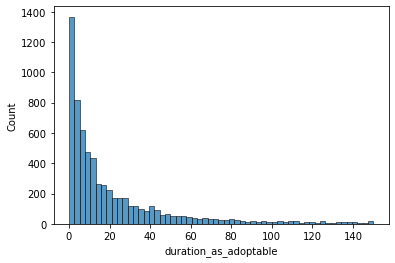

In [14]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted, binrange=(0, 150))

**Do local demographics affect the average adoption rates?**

In [15]:
census = pd.read_csv('data/census_wa_cleaned.csv')
census.set_index('index', inplace=True)
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, Aberdeen to Zillah
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total population                     613 non-null    int64  
 1   Total population Male                613 non-null    int64  
 2   Total population Female              613 non-null    int64  
 3   Total population Median age (years)  613 non-null    float64
 4   Total population 18 and over         613 non-null    int64  
 5   Total population 18 and over Male    613 non-null    int64  
 6   Total population 18 and over Female  613 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 38.3+ KB


In [17]:
census.rename(columns={'Total population':'population', 
                       'Total population Male':'male', 
                       'Total population Female':'female', 
                       'Total population Median age (years)':'avg age', 
                       'Total population 18 and over':'adults only', 
                       'Total population 18 and over Male':'adult male', 
                       'Total population 18 and over Female':'adult female'}, inplace=True)
census.head()

,population,male,female,avg age,adults only,adult male,adult female
index,,,,,,,
Aberdeen,16429,7924,8505,35.40000,11126,5300,5826
Aberdeen Gardens,261,132,129,57.60000,223,117,106
Addy,139,68,71,44.40000,95,38,57
Ahtanum,3359,1634,1725,38.20000,2223,1050,1173
Airway Heights,6449,4539,1910,35.70000,5260,3998,1262


In [18]:
adopted = adopted.join(census, on='city', how='left')
adopted.head()

,age,gender,size,coat,distance,duration_as_adoptable,city,hasimage,hasvideo,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,goodwith_children,goodwith_dogs,goodwith_cats,population,male,female,avg age,adults only,adult male,adult female
0,Baby,Female,Small,Short,8.22800,28.95851,Bremerton,True,False,True,False,False,False,True,Tabby,Domestic Short Hair,True,False,True,None,True,39017.00000,20949.00000,18068.00000,32.10000,30985.00000,16949.00000,14036.00000
1,Baby,Female,Large,NaN,4.38880,58.32332,Bremerton,True,False,True,True,False,False,False,Tabby,Domestic Long Hair,True,False,False,False,True,39017.00000,20949.00000,18068.00000,32.10000,30985.00000,16949.00000,14036.00000
2,Adult,Female,Medium,Long,0.35190,46.10532,Chehalis,True,False,True,True,False,True,True,Domestic Long Hair,None,False,False,None,None,True,7314.00000,3743.00000,3571.00000,33.90000,5228.00000,2556.00000,2672.00000
3,Adult,Female,Medium,Short,0.35190,27.26280,Chehalis,True,False,True,True,False,False,True,Domestic Short Hair,None,True,False,None,True,False,7314.00000,3743.00000,3571.00000,33.90000,5228.00000,2556.00000,2672.00000
4,Young,Female,Medium,Short,0.35190,82.94777,Chehalis,True,False,True,True,False,True,True,Siamese,None,True,False,None,None,True,7314.00000,3743.00000,3571.00000,33.90000,5228.00000,2556.00000,2672.00000


In [21]:
city_count = adopted['city'].value_counts(sort=True)
city_count = pd.DataFrame(data=city_count)
city_count = city_count.join(census, how='left')
city_count.sort_values('city', ascending=False).head(10)

,city,population,male,female,avg age,adults only,adult male,adult female
Woodinville,1107,11373.00000,5471.00000,5902.00000,40.80000,8084.00000,3770.00000,4314.00000
Longview,786,36619.00000,17653.00000,18966.00000,42.10000,27689.00000,13134.00000,14555.00000
Stanwood,597,6560.00000,2938.00000,3622.00000,33.60000,4356.00000,1960.00000,2396.00000
Puyallup,367,38720.00000,19478.00000,19242.00000,37.70000,29181.00000,14724.00000,14457.00000
Pasco,338,67391.00000,34406.00000,32985.00000,28.50000,33118.00000,16727.00000,16391.00000
Bellingham,324,82944.00000,40861.00000,42083.00000,31.20000,65803.00000,32034.00000,33769.00000
Yakima,270,93261.00000,46470.00000,46791.00000,33.10000,56099.00000,27637.00000,28462.00000
Port Angeles,226,19200.00000,9532.00000,9668.00000,41.90000,15016.00000,7459.00000,7557.00000
Kirkland,212,84721.00000,41336.00000,43385.00000,38.10000,59180.00000,28864.00000,30316.00000
Federal Way,187,92859.00000,46041.00000,46818.00000,35.80000,60751.00000,29635.00000,31116.00000


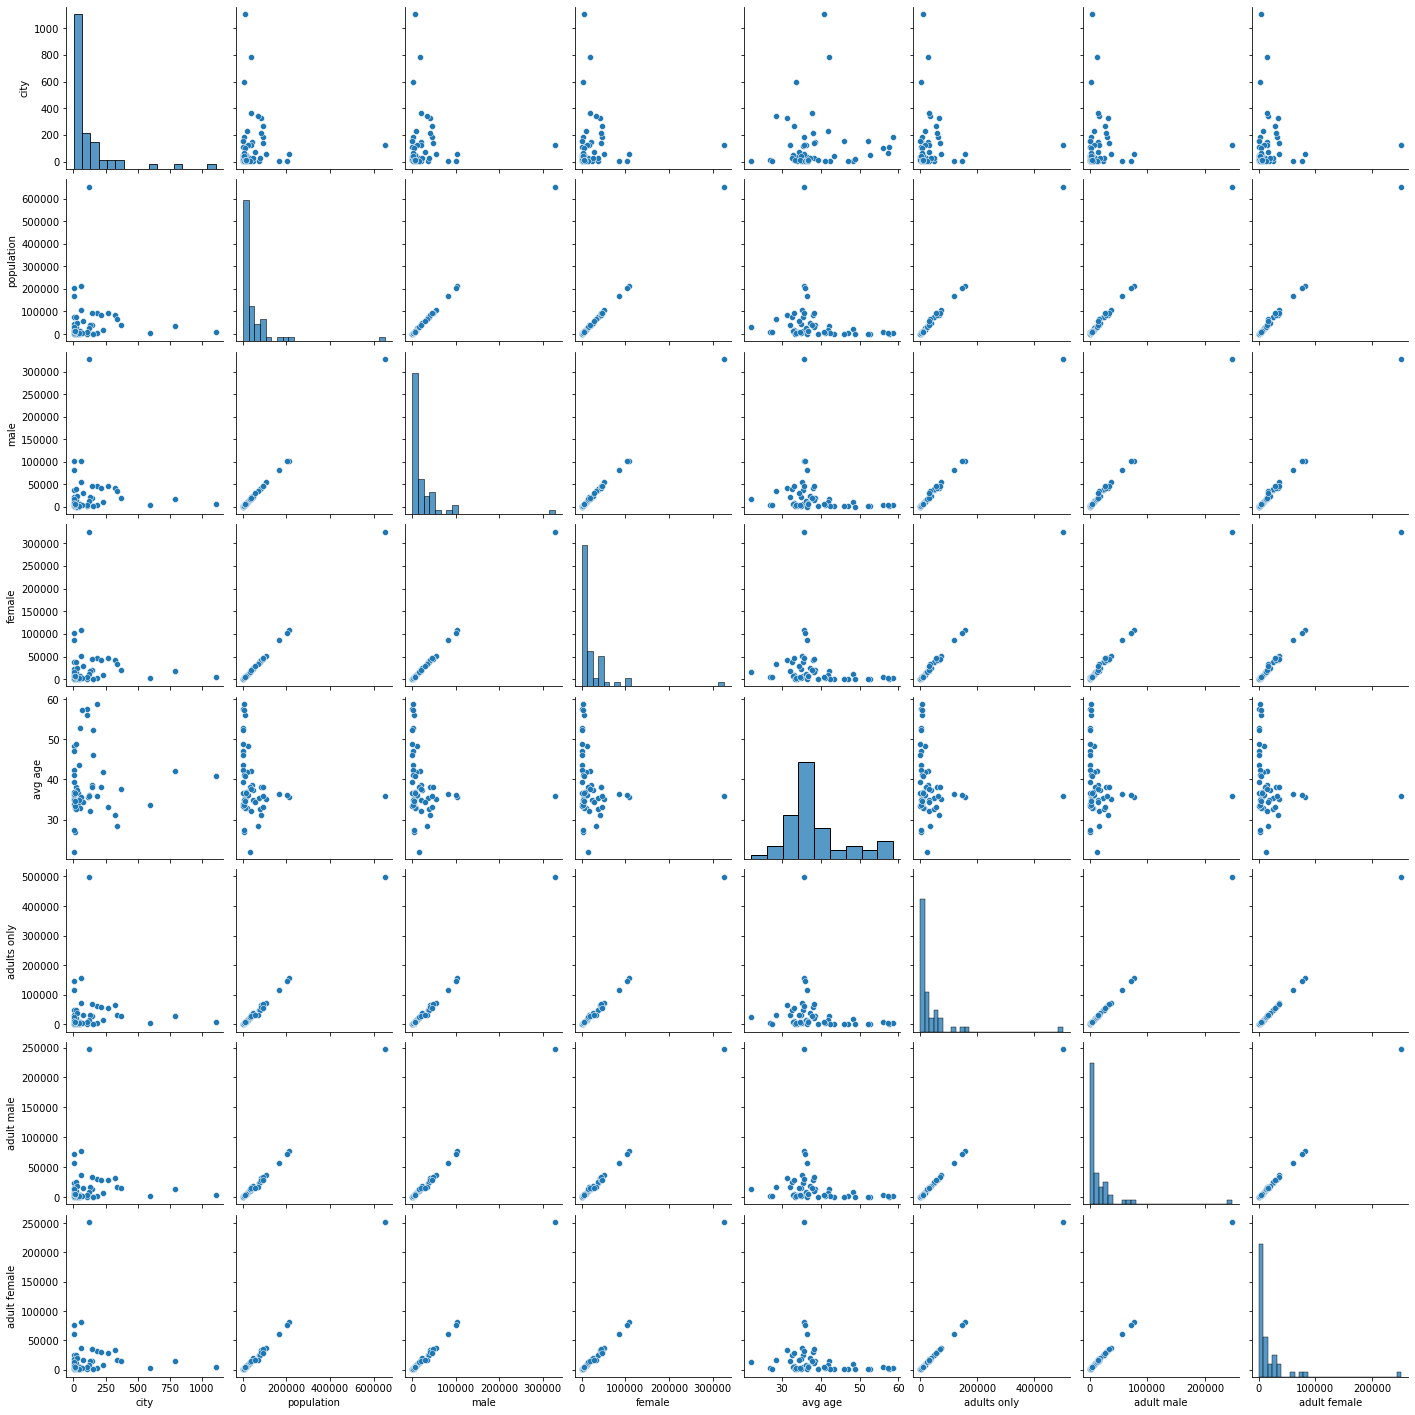

In [22]:
sns.pairplot(city_count)

In [24]:
city_count.corr()['city']

city            1.00000
population     -0.00558
male           -0.00521
female         -0.00596
avg age         0.04540
adults only    -0.00631
adult male     -0.00595
adult female   -0.00666
Name: city, dtype: float64

**A:** The size of a city doesn't have as strong a correlation to adoption rates as I expected

**What are the most adopetd breeds? Alternately, what are the most available breeds?**

In [26]:
adopted['breed_primary'].value_counts(sort=True).head()

Domestic Short Hair     4124
Domestic Medium Hair     701
Tabby                    626
Domestic Long Hair       455
Siamese                  223
Name: breed_primary, dtype: int64

**What are the most adopted breeds in each city?**

In [30]:
adopted_by_city = adopted.groupby(['city', 'breed_primary']).size().unstack()
adopted_by_city.sample(10)

breed_primary,Abyssinian,American Bobtail,American Shorthair,Applehead Siamese,Balinese,Bengal,Birman,Bombay,British Shorthair,Burmese,Calico,Chartreux,Devon Rex,Dilute Calico,Dilute Tortoiseshell,Domestic Long Hair,Domestic Medium Hair,Domestic Short Hair,Egyptian Mau,Exotic Shorthair,Extra-Toes Cat / Hemingway Polydactyl,Himalayan,Maine Coon,Manx,Munchkin,Norwegian Forest Cat,Persian,Pixiebob,Ragamuffin,Ragdoll,Russian Blue,Scottish Fold,Siamese,Siberian,Silver,Singapura,Snowshoe,Tabby,Tiger,Tonkinese,Torbie,Tortoiseshell,Turkish Angora,Turkish Van,Tuxedo
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ferndale,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00000,nan,nan,nan,1.00000,6.00000,37.00000,nan,nan,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,1.00000,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Battle Ground,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,9.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Spokane,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Longview,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00000,nan,nan,2.00000,nan,49.00000,93.00000,575.00000,nan,nan,nan,nan,2.00000,nan,nan,nan,nan,nan,nan,1.00000,1.00000,1.00000,40.00000,nan,nan,nan,3.00000,12.00000,nan,nan,3.00000,1.00000,nan,nan,nan
Redmond,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5.00000,5.00000,34.00000,nan,1.00000,nan,4.00000,nan,1.00000,nan,nan,16.00000,nan,1.00000,1.00000,nan,1.00000,2.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.00000,nan,nan,3.00000,nan,9.00000,18.00000,59.00000,nan,nan,1.00000,nan,2.00000,nan,nan,nan,nan,nan,nan,nan,1.00000,nan,2.00000,nan,nan,nan,nan,43.00000,nan,nan,1.00000,5.00000,nan,nan,7.00000
Burlington,nan,nan,1.00000,nan,nan,nan,nan,4.00000,nan,nan,1.00000,nan,nan,1.00000,1.00000,2.00000,11.00000,24.00000,nan,nan,nan,nan,1.00000,nan,nan,1.00000,nan,nan,nan,nan,1.00000,nan,2.00000,nan,nan,nan,nan,46.00000,nan,nan,nan,4.00000,nan,1.00000,14.00000
Puyallup,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,48.00000,48.00000,264.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.00000,nan,nan,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,nan
Steilacoom,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00000,nan,nan,nan,1.00000,nan,nan,nan


In [31]:
most_adopted_by_city = adopted_by_city.idxmax(axis=1)
print("Most adopted cat per city:")
most_adopted_by_city

Most adopted cat per city:


city
Auburn                Domestic Short Hair
Bainbridge Island     Domestic Short Hair
Battle Ground         Domestic Short Hair
Bellingham            Domestic Short Hair
Bothell               Domestic Short Hair
Bow                            Maine Coon
Bremerton                           Tabby
Burlington                          Tabby
Camano Island         Domestic Short Hair
Chehalis              Domestic Short Hair
Chewelah              Domestic Short Hair
Coupeville            Domestic Short Hair
Des Moines             American Shorthair
Edmonds               Domestic Short Hair
Everett               Domestic Short Hair
Federal Way           Domestic Short Hair
Ferndale              Domestic Short Hair
Friday Harbor         Domestic Short Hair
Kelso                               Tabby
Kennewick             Domestic Short Hair
Kirkland              Domestic Short Hair
La Center                          Birman
Lacey                              Bengal
Langley                      

# Machine Learning

In [32]:
df = adopted[['gender', 'size', 'coat', 'duration_as_adoptable', 'hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'declawed', 'special_needs', 'shots_current', 'goodwith_children', 'goodwith_dogs', 'goodwith_cats']]
df[['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']] = adopted[['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']].astype(int)
df = pd.get_dummies(df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
df.head()

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,declawed,special_needs,shots_current,gender_Female,gender_Male,size_Extra Large,size_Large,size_Medium,size_Small,coat_Hairless,coat_Long,coat_Medium,coat_Short,goodwith_children_False,goodwith_children_True,goodwith_dogs_False,goodwith_dogs_True,goodwith_cats_False,goodwith_cats_True
0,28.95851,1,0,1,0,False,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,58.32332,1,0,1,1,False,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
2,46.10532,1,0,1,1,False,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,27.26280,1,0,1,1,False,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
4,82.94777,1,0,1,1,False,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6821 entries, 0 to 6820
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_as_adoptable    6821 non-null   float64
 1   hasimage                 6821 non-null   int64  
 2   hasvideo                 6821 non-null   int64  
 3   spayed_neutered          6821 non-null   int64  
 4   house_trained            6821 non-null   int64  
 5   declawed                 6821 non-null   bool   
 6   special_needs            6821 non-null   int64  
 7   shots_current            6821 non-null   int64  
 8   gender_Female            6821 non-null   uint8  
 9   gender_Male              6821 non-null   uint8  
 10  size_Extra Large         6821 non-null   uint8  
 11  size_Large               6821 non-null   uint8  
 12  size_Medium              6821 non-null   uint8  
 13  size_Small               6821 non-null   uint8  
 14  coat_Hairless           

In [35]:
df_corr = df.corr()
df_corr

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,declawed,special_needs,shots_current,gender_Female,gender_Male,size_Extra Large,size_Large,size_Medium,size_Small,coat_Hairless,coat_Long,coat_Medium,coat_Short,goodwith_children_False,goodwith_children_True,goodwith_dogs_False,goodwith_dogs_True,goodwith_cats_False,goodwith_cats_True
duration_as_adoptable,1.00000,0.06180,0.00228,-0.00719,0.09886,0.04231,0.17817,-0.03138,0.02194,-0.02194,0.03933,0.06464,-0.04614,-0.00564,0.01389,0.02715,-0.02144,-0.00274,0.12975,0.00472,0.10677,0.03338,0.11110,0.07980
hasimage,0.06180,1.00000,0.03433,-0.04679,0.15216,-0.00008,0.00561,-0.01859,0.00576,-0.00576,0.00457,0.03506,-0.03763,0.01634,0.00441,0.02510,-0.00464,0.00692,0.04933,0.07000,0.03656,0.07089,0.02565,0.12743
hasvideo,0.00228,0.03433,1.00000,0.05472,0.14185,-0.01805,-0.00190,0.03561,-0.02629,0.02629,-0.00541,-0.01467,0.05453,-0.05354,-0.00457,-0.00181,0.00239,0.01141,-0.01958,0.19110,-0.01850,0.18743,-0.01258,0.12224
spayed_neutered,-0.00719,-0.04679,0.05472,1.00000,0.06866,0.02810,0.02112,0.33458,-0.01379,0.01379,0.01057,0.04497,-0.06695,0.04274,0.00837,-0.01019,-0.04279,0.02366,0.06399,0.02515,-0.03490,0.03864,0.05376,-0.04808
house_trained,0.09886,0.15216,0.14185,0.06866,1.00000,0.02904,0.05699,0.00019,-0.00636,0.00636,0.02906,0.12901,-0.06199,-0.03646,-0.00639,0.00766,0.03039,-0.07671,0.06925,0.31049,0.11039,0.22820,0.06387,0.43687
declawed,0.04231,-0.00008,-0.01805,0.02810,0.02904,1.00000,0.03701,-0.00660,0.00184,-0.00184,0.06852,0.04230,-0.04729,0.00714,-0.00232,0.02676,0.00614,-0.01753,0.04869,-0.00287,0.07131,-0.01993,0.05026,-0.01246
special_needs,0.17817,0.00561,-0.00190,0.02112,0.05699,0.03701,1.00000,-0.00574,-0.01479,0.01479,0.03599,0.08258,-0.03830,-0.02914,-0.00371,0.01740,-0.00996,-0.03184,0.02055,0.01691,0.04997,-0.00862,0.07042,0.00180
shots_current,-0.03138,-0.01859,0.03561,0.33458,0.00019,-0.00660,-0.00574,1.00000,-0.00317,0.00317,-0.00643,-0.05776,0.10598,-0.08109,0.00553,-0.00647,-0.10673,0.08894,-0.01812,-0.10981,-0.17624,-0.02206,-0.01446,-0.06597
gender_Female,0.02194,0.00576,-0.02629,-0.01379,-0.00636,0.00184,-0.01479,-0.00317,1.00000,-1.00000,-0.03451,-0.15530,0.05928,0.06258,0.01103,0.01169,-0.02686,0.01209,0.02951,-0.01018,0.01750,-0.01458,0.04918,-0.02896
gender_Male,-0.02194,-0.00576,0.02629,0.01379,0.00636,-0.00184,0.01479,0.00317,-1.00000,1.00000,0.03451,0.15530,-0.05928,-0.06258,-0.01103,-0.01169,0.02686,-0.01209,-0.02951,0.01018,-0.01750,0.01458,-0.04918,0.02896


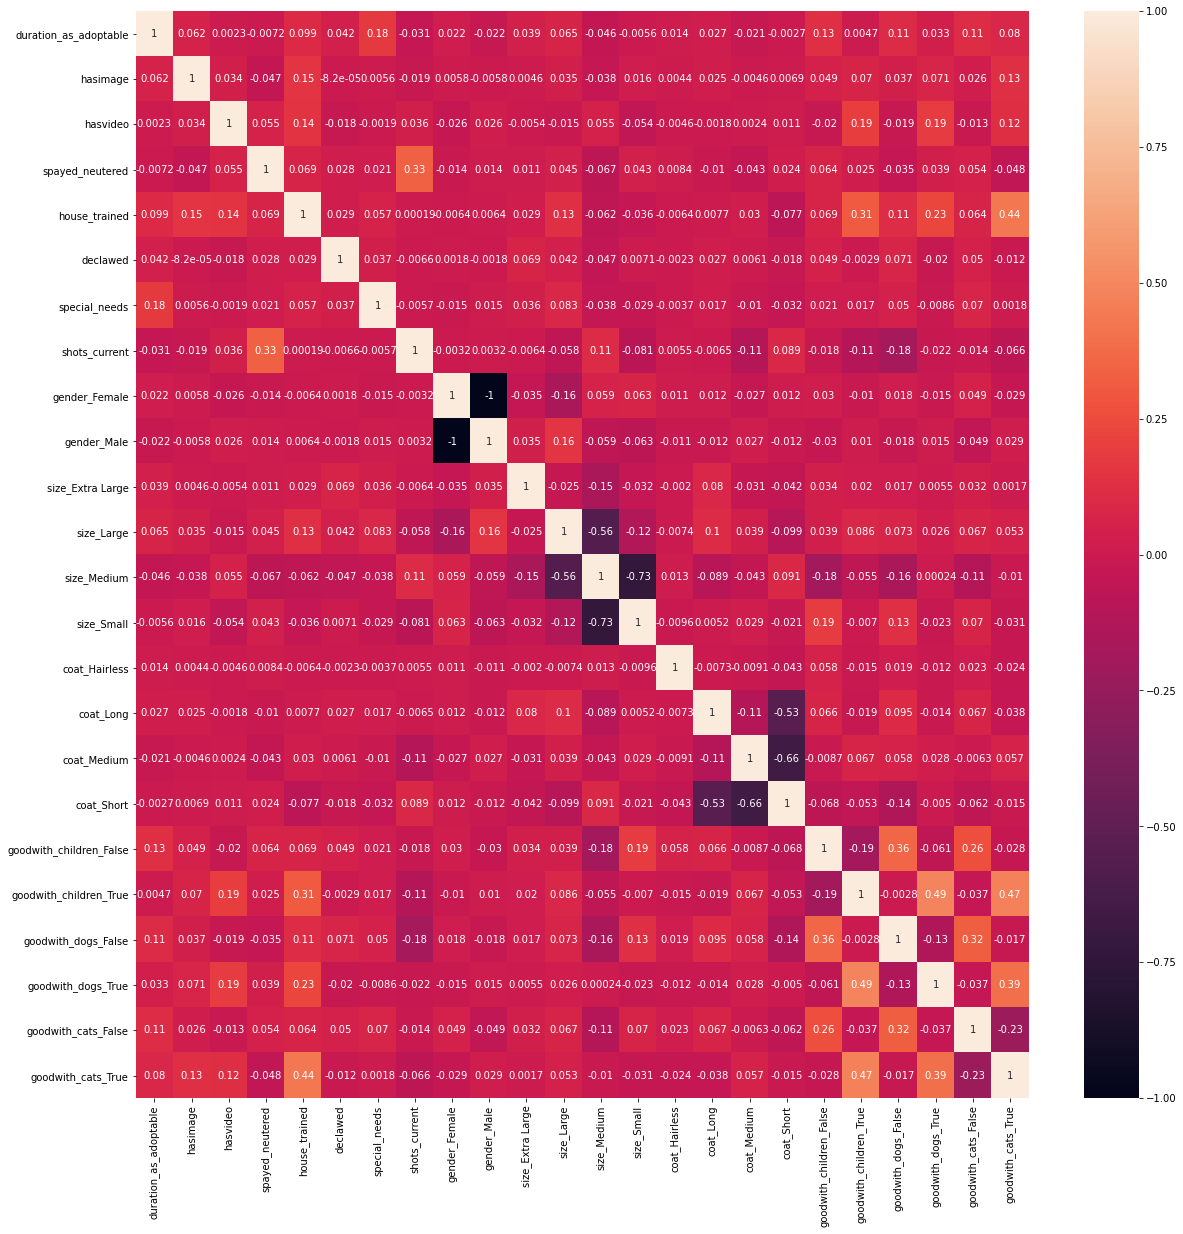

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot = True)

In [37]:
len(df) * .7, len(df) * .3

(4774.7, 2046.3)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='duration_as_adoptable'), 
                                                    df.duration_as_adoptable, test_size=0.3, 
                                                    random_state=47)

In [39]:
X_train.shape, X_test.shape

((4774, 23), (2047, 23))

In [40]:
y_train.shape, y_test.shape

((4774,), (2047,))

## Random Forest Model

In [41]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [42]:
rf_default_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [43]:
rf_cv_scores = rf_default_results['test_score']
rf_cv_scores

array([-0.07665922, -0.19247061, -0.04723285,  0.07339352, -0.02174057])

In [44]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.05294194627677327, 0.08602038042080858)

In [45]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [46]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [47]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [48]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

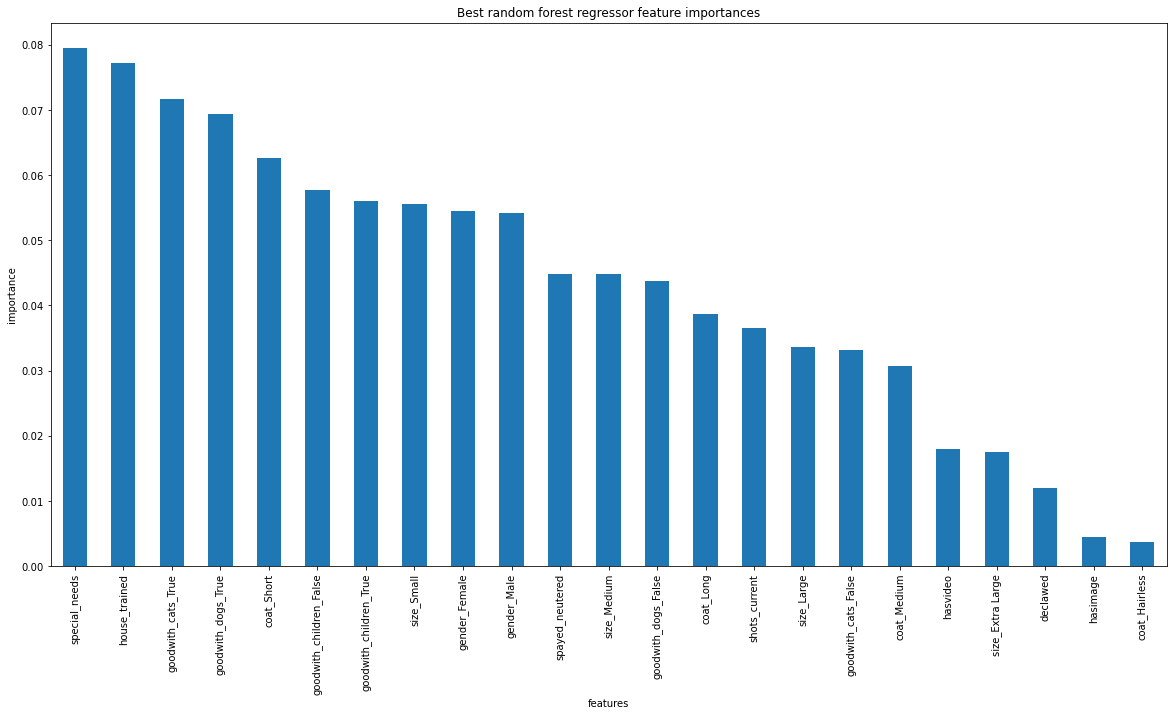

In [49]:
plt.subplots(figsize=(20, 10))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)[:50]
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');